In [1]:
import collections
import numpy as np
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 

from keras import backend as K

#Clear TF memory
cfg = K.tf.ConfigProto()
cfg.gpu_options.allow_growth = True
K.set_session(K.tf.Session(config=cfg))

C:\Users\StrikeWade\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# Configuration

In [2]:
batch_size = 20
embedding_size = 2        #For visualization
num_sampled = 15          #Number of negative examples to sample     

# Sentences

In [3]:
#Sample sentences
sentences = ["the quick brown fox jumped over the lazy dog",
            "I love cats and dogs",
            "we all love cats and dogs",
            "cats and dogs are great",
            "sung likes cats",
            "she loves dogs",
            "cats can be very independent",
            "cats are great companions when they want to be",
            "cats are playful",
            "cats are natural hunters",
            "It's raining cats and dogs",
            "dogs and cats love sung"]

print('sentence is %s and length %d' % (type(sentences), len(sentences)))

sentence is <class 'list'> and length 12


# Sentences to words and count
Words: list of all words

In [4]:
words = ' '.join(sentences)
print(words)
words = words.split()
print('')
print('words is %s and lengths is %d\n' % (type(words), len(words)))
print(words)

the quick brown fox jumped over the lazy dog I love cats and dogs we all love cats and dogs cats and dogs are great sung likes cats she loves dogs cats can be very independent cats are great companions when they want to be cats are playful cats are natural hunters It's raining cats and dogs dogs and cats love sung

words is <class 'list'> and lengths is 62

['the', 'quick', 'brown', 'fox', 'jumped', 'over', 'the', 'lazy', 'dog', 'I', 'love', 'cats', 'and', 'dogs', 'we', 'all', 'love', 'cats', 'and', 'dogs', 'cats', 'and', 'dogs', 'are', 'great', 'sung', 'likes', 'cats', 'she', 'loves', 'dogs', 'cats', 'can', 'be', 'very', 'independent', 'cats', 'are', 'great', 'companions', 'when', 'they', 'want', 'to', 'be', 'cats', 'are', 'playful', 'cats', 'are', 'natural', 'hunters', "It's", 'raining', 'cats', 'and', 'dogs', 'dogs', 'and', 'cats', 'love', 'sung']


# Count: list of pairs, each pair consists of (key, value)

In [5]:
count = collections.Counter(words)   #Counter type
print(count, type(count))
print('')
count = count.most_common()          #Convert from Counter type to List type
print(count, type(count))
print('')


print('count is %s and length is %d' % (type(count), len(count)))
print('')
print('Word count of top 5 is %s' % count[:5])
print('')
print(count)

Counter({'cats': 10, 'dogs': 6, 'and': 5, 'are': 4, 'love': 3, 'the': 2, 'great': 2, 'sung': 2, 'be': 2, 'quick': 1, 'playful': 1, 'likes': 1, 'hunters': 1, 'dog': 1, 'very': 1, 'to': 1, 'can': 1, 'when': 1, 'she': 1, 'brown': 1, 'lazy': 1, 'we': 1, 'companions': 1, 'all': 1, 'independent': 1, 'over': 1, 'raining': 1, 'want': 1, 'loves': 1, 'jumped': 1, 'I': 1, 'natural': 1, "It's": 1, 'fox': 1, 'they': 1}) <class 'collections.Counter'>

[('cats', 10), ('dogs', 6), ('and', 5), ('are', 4), ('love', 3), ('the', 2), ('great', 2), ('sung', 2), ('be', 2), ('quick', 1), ('playful', 1), ('likes', 1), ('hunters', 1), ('dog', 1), ('very', 1), ('to', 1), ('can', 1), ('when', 1), ('she', 1), ('brown', 1), ('lazy', 1), ('we', 1), ('companions', 1), ('all', 1), ('independent', 1), ('over', 1), ('raining', 1), ('want', 1), ('loves', 1), ('jumped', 1), ('I', 1), ('natural', 1), ("It's", 1), ('fox', 1), ('they', 1)] <class 'list'>

count is <class 'list'> and length is 35

Word count of top 5 is [('ca

In [6]:
print(words[0:5])
print(count[0:5])

['the', 'quick', 'brown', 'fox', 'jumped']
[('cats', 10), ('dogs', 6), ('and', 5), ('are', 4), ('love', 3)]


# Build dictionary

In [7]:
r_dict = [i[0] for i in count]                     #Reverse dict, idx -> word
print(r_dict, '\n')
dictionary = {w: i for i, w in enumerate(r_dict)}  #dictionary, word -> id
print(dictionary)
voc_size = len(dictionary)                         #Number of vocabulary

print('')
print('r_dict is %s and length is %d' % (type(r_dict), len(r_dict)))
print('dictionary is %s and length is %d' % (type(dictionary), len(dictionary)))

['cats', 'dogs', 'and', 'are', 'love', 'the', 'great', 'sung', 'be', 'quick', 'playful', 'likes', 'hunters', 'dog', 'very', 'to', 'can', 'when', 'she', 'brown', 'lazy', 'we', 'companions', 'all', 'independent', 'over', 'raining', 'want', 'loves', 'jumped', 'I', 'natural', "It's", 'fox', 'they'] 

{'quick': 9, 'playful': 10, 'likes': 11, 'the': 5, 'over': 25, 'great': 6, 'jumped': 29, 'love': 4, 'dog': 13, 'to': 15, 'cats': 0, 'can': 16, 'and': 2, 'raining': 26, 'sung': 7, 'she': 18, 'brown': 19, 'lazy': 20, 'we': 21, 'dogs': 1, 'companions': 22, 'all': 23, 'independent': 24, 'want': 27, 'very': 14, 'loves': 28, 'hunters': 12, 'I': 30, 'natural': 31, 'fox': 33, "It's": 32, 'when': 17, 'are': 3, 'they': 34, 'be': 8}

r_dict is <class 'list'> and length is 35
dictionary is <class 'dict'> and length is 35


# Make indexed word data (ordered)

In [8]:
data = [dictionary[word] for word in words]
print(data, '\n')
print('data is %s and length is %d\n' % (type(data), len(data)))
print('Sample data: numbers: %s / words: %s' % (data[:10], [r_dict[t] for t in data[:10]]))

[5, 9, 19, 33, 29, 25, 5, 20, 13, 30, 4, 0, 2, 1, 21, 23, 4, 0, 2, 1, 0, 2, 1, 3, 6, 7, 11, 0, 18, 28, 1, 0, 16, 8, 14, 24, 0, 3, 6, 22, 17, 34, 27, 15, 8, 0, 3, 10, 0, 3, 31, 12, 32, 26, 0, 2, 1, 1, 2, 0, 4, 7] 

data is <class 'list'> and length is 62

Sample data: numbers: [5, 9, 19, 33, 29, 25, 5, 20, 13, 30] / words: ['the', 'quick', 'brown', 'fox', 'jumped', 'over', 'the', 'lazy', 'dog', 'I']


# Make a training data for window size 1 for simplicity

In [9]:
# ([the, brown], quick), ([quick, fox], brown), ([brown, jumped], fox),....

cbow_pairs = []
for i in range(1, len(data)-1):
    cbow_pairs.append([[data[i-1], data[i+1]], data[i]])
print('Context pairs: %s' % cbow_pairs[:15])

Context pairs: [[[5, 19], 9], [[9, 33], 19], [[19, 29], 33], [[33, 25], 29], [[29, 5], 25], [[25, 20], 5], [[5, 13], 20], [[20, 30], 13], [[13, 4], 30], [[30, 0], 4], [[4, 2], 0], [[0, 1], 2], [[2, 21], 1], [[1, 23], 21], [[21, 4], 23]]


# See type and length of 'cbow_pairs'

In [10]:
print('cbow_pairs is %s and length is %d' % (type(cbow_pairs), len(cbow_pairs)))

cbow_pairs is <class 'list'> and length is 60


# Let's make skip-gram pairs

In [11]:
# (quick, the), (quick, brown), (brown, quick), (brown, fox), ...
skip_gram_pairs = []
for c in cbow_pairs:
    skip_gram_pairs.append([c[1], c[0][0]])
    skip_gram_pairs.append([c[1], c[0][1]])
    
print('skip_gram_pairs is %s and length is %d' % (type(skip_gram_pairs), len(skip_gram_pairs)))
print('skip_gram_pairs:', skip_gram_pairs[:10])

skip_gram_pairs is <class 'list'> and length is 120
skip_gram_pairs: [[9, 5], [9, 19], [19, 9], [19, 33], [33, 19], [33, 29], [29, 33], [29, 25], [25, 29], [25, 5]]


In [12]:
def generate_batch(size):
    assert size < len(skip_gram_pairs)
    x_data = []
    y_data = []
    r = np.random.choice(range(len(skip_gram_pairs)), size=size, replace=False)
    
    for i in r:
        x_data.append(skip_gram_pairs[i][0])   # n dim
        y_data.append([skip_gram_pairs[i][1]]) # n, 1 dim
    return x_data, y_data

#Generate batch test
print('Batches (x, y):', generate_batch(3))

Batches (x, y): ([31, 17, 1], [[3], [22], [2]])


# Construct network

In [13]:
#input data
train_input = tf.placeholder(dtype=tf.int32, shape=[batch_size])
#Need to shape [batch_size, 1] for nn.nce_loss
train_label = tf.placeholder(dtype=tf.int32, shape=[batch_size, 1])

#Look up embeddins for inputs
embeddings = tf.Variable(tf.random_uniform([voc_size, embedding_size], -1.0, 1.0))
embed = tf.nn.embedding_lookup(embeddings, train_input)  #Lookup table


#Construct the variables for the NCE loss
nce_weights = tf.Variable(tf.random_uniform([voc_size, embedding_size], -1.0, 1.0))
nce_biases = tf.Variable(tf.zeros([voc_size]))

#Compute the average NCE loss for batch
loss = tf.reduce_mean(tf.nn.nce_loss(weights=nce_weights, 
                                     biases=nce_biases, 
                                     labels=train_label, 
                                     inputs=embed, 
                                     num_sampled=num_sampled, 
                                     num_classes=voc_size))

#Use the adamoptimizer
train_op = tf.train.AdamOptimizer(learning_rate=0.01).minimize(loss)

# Training

In [14]:
init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    
    for step in range(3000):
        batch_inputs, batch_labels = generate_batch(batch_size)
        _, loss_val = sess.run([train_op, loss], feed_dict={train_input: batch_inputs, train_label: batch_labels})
        
        if step % 500 == 0:
            print('Loss at %d: %.5f' % (step, loss_val))
            
    #Final embedings are ready to use
    #Need to normalize for practical use
    trained_embeddings = embeddings.eval()

Loss at 0: 16.38064
Loss at 500: 3.48483
Loss at 1000: 3.26623
Loss at 1500: 3.02590
Loss at 2000: 3.20041
Loss at 2500: 3.07135


In [15]:
trained_embeddings.shape

(35, 2)

# Plot result

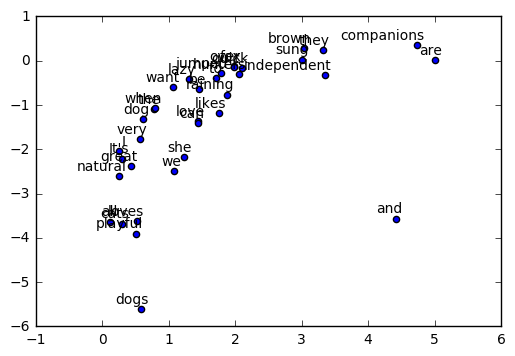

In [18]:
#Show word2vec if dim is 2
if trained_embeddings.shape[1] == 2:
    labels = r_dict[:35] #Show top 20 words
    
    for i, label in enumerate(labels):
        x, y = trained_embeddings[i, :]
        plt.scatter(x, y)
        plt.annotate(label, xy=(x,y), xytext=(5,2), textcoords='offset points', ha='right', va='bottom')